In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# you can choose one of the following package for image reading/processing
import cv2
from google.colab.patches import cv2_imshow
import PIL

## This part is to include all the functions

In [ ]:
def one_hot(t):
  temp = np.zeros((10,1))
  temp[t] = 1
  return temp

def shuffle_and_split(data,test_percent = 0.2,axis=1):
  df=pd.DataFrame.from_records(data)
  df = df.sample(frac=1)
  # print(df)
  temp = np.array(df)
  temp = np.transpose(temp)
  shape = temp.shape
  # print(shape)
  test_data = temp[0:shape[0]-10,0:round(shape[1]*test_percent)]
  test_target = temp[shape[0]-10:shape[0],0:round(shape[1]*test_percent)]
  # print(test_target)

  train_data = temp[0:shape[0]-10,round(shape[1]*test_percent):shape[1]]
  train_target = temp[shape[0]-10:shape[0], round(shape[1]*test_percent):shape[1]]

  return train_data.transpose(), train_target.transpose(), test_data.transpose(), test_target.transpose()


#------------------------------------------------------------------------------
##/ 1.2 Logistic Regression
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
    # return 1/(1 + np.exp(-x))

def error_calculation(y,t):
  error = 0

  N = y.shape[0]
  t_ = np.argmax(t,axis=1)
  y_ = np.argmax(y,axis=1)
  # print(y)
  for n in range(y.shape[0]):
      error = error - (-y[n][y_[n]]+t[n][t_[n]])*1/N*np.log(y[n][t_[n]]+0.00001) ## Note about the error mistake
  return error

def accuration_calulation(X_,W,t):
  y_ = np.dot(X_,W)
  
  y_ = np.argmax(y_,axis=1)
  t_ = np.argmax(t,axis=1)
  correct = 0
  for i in range (X_.shape[0]):
    if y_[i]==t_[i]:
      correct += 1
      # print("nice")
  # print('correct = ', correct)
  accuracy = correct*100/X_.shape[0]
  return accuracy

def diagonal(R):
  N = R.shape[0]
  diag_matrix = np.zeros((N,N))
  for i in range(N):
    diag_matrix[i][i] = R[i][i]
  
  return diag_matrix


# Data normalization 
We can use the below equation to normalize the input data.

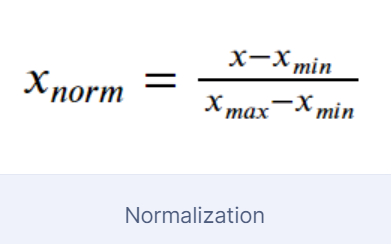

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/Homework2/MNIST/{}/{}.jpg"
# temp = os.listdir(path) 
# number_files = len(temp)
number_files = 128
# print(number_files)

path = r"/content/drive/MyDrive//Colab Notebooks/Homework2/MNIST/0/0.jpg"

# Normalize the data
img = cv2.imread(path)
img = np.array(img)
img = (img-img.max())/(img.max() - img.min())
print(img.shape)
img = img.flatten()
img = img.reshape(-1,1)
t_vector = one_hot(0)
print(t_vector)
temp = np.concatenate((img,t_vector),axis=0)
print(temp.shape)




# cv2_imshow(img)
large_matrix = []
class_num = 10
for k in range(class_num):
  path = r"/content/drive/MyDrive//Colab Notebooks/Homework2/MNIST/{}/{}.jpg"
  t_vector = one_hot(k)
  for i in range(number_files):
    # print(temp_path)
    temp_path = path.format(k,i)
    # print(temp_path)
    img = cv2.imread(temp_path)
    img = np.array(img)
    img = (img-img.max())/(img.max() - img.min())
    img = img.flatten()
    # print(k)
    img = img.reshape(-1,1)
    
    # print(t_vector)
    temp = np.concatenate((img,t_vector),axis=0)
    large_matrix.append(temp) 
    ##/ dim(large_matrix) = (128*10,2362)
    ##/ large_matrix[k][2362-10:2362] is the target

large_matrix = np.array(large_matrix)
# print (large_matrix[4][2362-10:2362])
  # print(temp.shape)



# **1.1 Least squares for classification**
## Finding the weight 

In [ ]:
temp_matrix = (large_matrix)
shape = temp_matrix.shape
# print(shape)
temp_matrix = temp_matrix.reshape((shape[0],shape[1]))
# temp_matrix = np.transpose(temp_matrix) # ((2362, 1280)) 2362 is flatten + one_hot, 1280 is N sample

train_data, train_target, test_data, test_target = shuffle_and_split(temp_matrix,test_percent=0.2)
train_target.shape
a = np.dot(train_data.transpose(),train_data)
a = np.linalg.pinv(a)
b = np.dot(train_data.transpose(),train_target)
W = np.dot(a,b)



## Calculate the prediction for training and testing data using the trained Weight

nan
the accuracy of training data =  89.94140625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


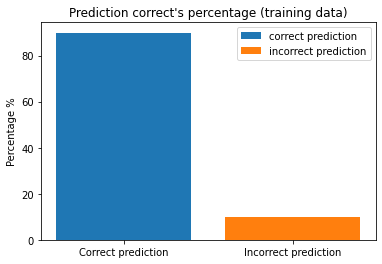

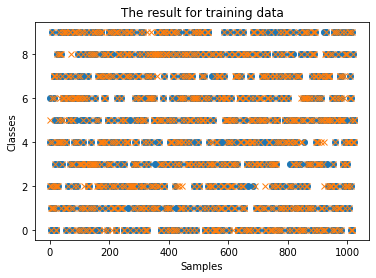

nan
the accuracy of testing data =  91.40625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


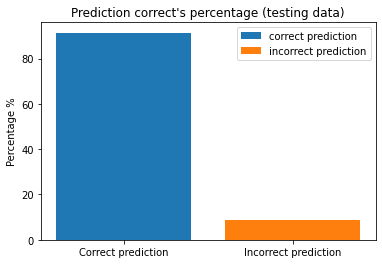

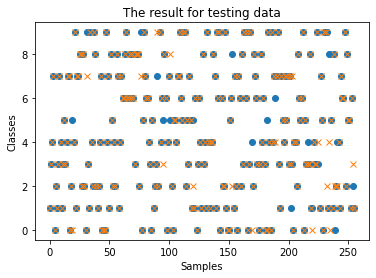

In [353]:
##/ Test for traning data
y = np.dot(train_data,W)

i = np.argmax(y,axis=1)
i_target = np.argmax(train_target,axis=1)
##/ need to check for the error value
train_error = error_calculation(y,train_target)
 
print(train_error)
correct = 0
incorrect = 0
for k in range(i.shape[0]):
  if i[k]== i_target[k]:
    correct += 1
  else:
    incorrect +=1
    # print(i[k], " ", i_target[k])

  
print ("the accuracy of training data = ", (correct/i.shape[0])*100)

plt.bar("Correct prediction",(correct/i.shape[0])*100,label="correct prediction")
plt.bar("Incorrect prediction",(incorrect/i.shape[0])*100,label = "incorrect prediction")
plt.ylabel('Percentage %')
plt.title("Prediction correct's percentage (training data)")
plt.legend()
plt.show()

plt.plot(i,marker="o",linestyle="None")
plt.plot(i_target,marker="x",linestyle="None")
plt.title("The result for training data")
plt.ylabel("Classes")
plt.xlabel("Samples")
plt.show()


##/ Test for target data
y = np.dot(test_data,W)

i = np.argmax(y,axis=1)
i_target = np.argmax(test_target,axis=1)
test_error = error_calculation(y,test_target)
 
print(test_error)
 

correct1 = 0
incorrect1 = 0
for k in range(i.shape[0]):
  if i[k]== i_target[k]:
    correct1 += 1
  else:
    incorrect1 += 1
    # print(i[k], " ", i_target[k])

print ("the accuracy of testing data = ", (correct1/i.shape[0])*100)
plt.bar("Correct prediction",(correct1/i.shape[0])*100,label="correct prediction")
plt.bar("Incorrect prediction",(incorrect1/i.shape[0])*100,label = "incorrect prediction")
plt.ylabel('Percentage %')
plt.title("Prediction correct's percentage (testing data)")
plt.legend()
plt.show()

plt.plot(i,marker="o",linestyle="None")
plt.plot(i_target,marker="x",linestyle="None")
plt.title("The result for testing data")
plt.ylabel("Classes")
plt.xlabel("Samples")
plt.show()


# **1.2 Logistic regression**
## **Method1**: Batch gradient descent

In [ ]:
# general setting
epoch = 100
k = 10
temp_matrix = (large_matrix)
shape = temp_matrix.shape
temp_matrix = temp_matrix.reshape((shape[0],shape[1]))
train_data, train_target, test_data, test_target = shuffle_and_split(temp_matrix,test_percent=0.2)


# Batch gradient descent

W_new =  np.zeros((train_data.shape[1],k)) # 2352*10
X_ = train_data
t = train_target
# print(t[1,:])

X_test = test_data
t_test = test_target

# y = softmax(np.dot(X_,W_new))
# print(y)
# y_test = softmax(np.dot(X_test,W_new))

# R = np.dot(y,np.transpose(y))
# z = np.dot(X_,W_new)-np.dot(np.linalg.pinv(R),y-t)
# a = np.dot(np.transpose(X_),R)
# XRX = np.dot(a,X_)
# b = np.dot(a,z)
# W_new = np.dot(np.linalg.pinv(XRX),b)

train_accuracy = []
test_accuracy = []

train_error = []
test_error = []

for i in range(10):
  # y = softmax(np.dot(X_,W_new))
  # a = (np.argmax(y,axis=1)) 
  # print(a.shape)
  # error_train = error_calculation(y,t)
  # accuration_train = accuration_calulation(X_,W_new,t)
  # y_test = softmax(np.dot(X_test,W_new))
  # error_test = error_calculation(y_test,t_test)
  # accuration_test = accuration_calulation(X_test,W_new,t_test)

  # R = np.diag(np.ravel(y*(1-y)))
  # z1 =(np.dot(X_,W_new))
  # z2 = np.dot(np.linalg.pinv(R),y-t)
  # z = z1-z2
  # a = np.dot(np.transpose(X_),R)
  # XRX_1 = np.linalg.pinv(np.dot(a,X_))
  # b = np.dot(a,z)
  # W_new = np.dot(XRX_1,b)

  y = softmax(np.dot(X_,W_new))
  error_train = error_calculation(y,t)
  accuration_train = accuration_calulation(X_,W_new,t)
  train_accuracy.append(accuration_train)
  train_error.append(error_train)

  y_test = softmax(np.dot(X_test,W_new))
  error_test = error_calculation(y_test,t_test)
  accuration_test = accuration_calulation(X_test,W_new,t_test)
  test_accuracy.append(accuration_test)
  test_error.append(error_test)

  

  R = np.dot(y,np.transpose(1-y)) #Keep in mind that R is a diagonal matrix
  R = diagonal(R)
  a = np.dot(np.transpose(X_),R)
  # H = np.dot(a,X_)
  # H = H/X_.shape[0]
  grad = np.dot(X_.transpose(),y-t)
  # print(error_train,error_test)
  # print("epoch: ", i)
  # print(accuration_train, accuration_test)
  # W_new = W_new - np.dot(np.linalg.pinv(H),grad)
  W_new = W_new - 0.001*grad
  






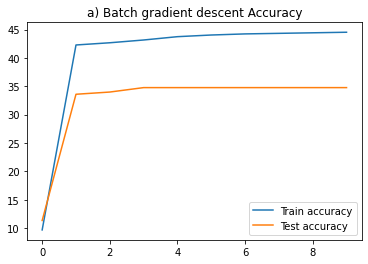

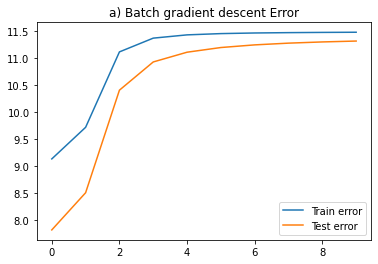

In [ ]:
plt.plot(train_accuracy,label='Train accuracy')
plt.plot(test_accuracy,label="Test accuracy")
plt.title("a) Batch gradient descent Accuracy")
plt.legend()
plt.show()

plt.plot(train_error,label="Train error")
plt.plot(test_error,label="Test error")
plt.title("a) Batch gradient descent Error")
plt.legend()
plt.show()



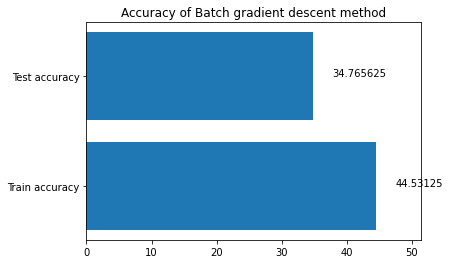

In [ ]:
labels = ['Train accuracy', 'Test accuracy']
values = [train_accuracy[9], test_accuracy[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

plt.title("Accuracy of Batch gradient descent method")
plt.show()

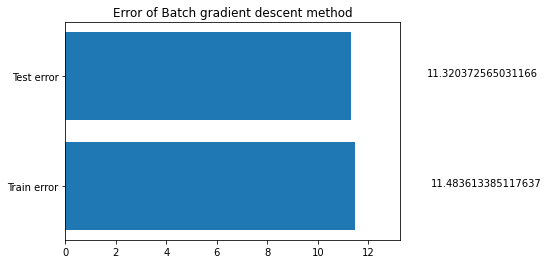

In [ ]:
labels = ['Train error', 'Test error']
values = [train_error[9], test_error[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.title("Error of Batch gradient descent method")
plt.show()

# 

## **Method 2**: Stochastic gradient descent

In [ ]:
# general setting
epoch = 100
k = 10
temp_matrix = (large_matrix)
shape = temp_matrix.shape
temp_matrix = temp_matrix.reshape((shape[0],shape[1]))
train_data, train_target, test_data, test_target = shuffle_and_split(temp_matrix,test_percent=0.2)


# Batch gradient descent

W_new =  np.zeros((train_data.shape[1],k)) # 2352*10
X_train = train_data
t_train = train_target
# print(t[1,:])

X_test = test_data
t_test = test_target


accuracy = []

train_accuracy = []
test_accuracy = []

train_error = []
test_error = []
for i in range (10):
  print ("epoch = ",i)
  y = softmax(np.dot(X_train,W_new))
  error_train = error_calculation(y,t_train)
  accuration_train = accuration_calulation(X_train,W_new,t_train)
  train_accuracy.append(accuration_train)
  train_error.append(error_train)

  y_test = softmax(np.dot(X_test,W_new))
  error_test = error_calculation(y_test,t_test)
  accuration_test = accuration_calulation(X_test,W_new,t_test)
  test_accuracy.append(accuration_test)
  test_error.append(error_test)
  for k in range(X_train.shape[0]):
    X_ = X_train[k,:]
    X_ = np.reshape(X_,(1,X_train.shape[1]))
    t = t_train[k,:]
    y = softmax(np.dot(X_,W_new))
    if (np.argmax(y) == np.argmax(t)):
      correct += 1
      # print(correct)
    # error_train = error_calculation(y,t)
    # accuration_train = accuration_calulation(X_,W_new,t)
    y_test = softmax(np.dot(X_test,W_new))
    # error_test = error_calculation(y_test,t_test)
    # accuration_test = accuration_calulation(X_test,W_new,t_test)
    R = np.dot(y,np.transpose(1-y)) #Keep in mind that R is a diagonal matrix
    R = diagonal(R)
    a = np.dot(np.transpose(X_),R)
    H = np.dot(a,X_)
    grad = np.dot(X_.transpose(),y-t)
    # print(error_train,error_test)
    # print(accuration_train, accuration_test)
    W_new = W_new - 0.001*grad
  

  

epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8
epoch =  9


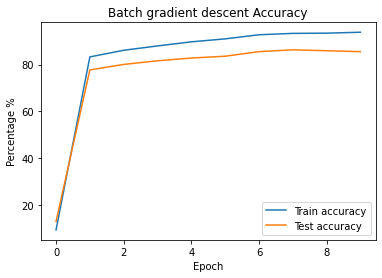

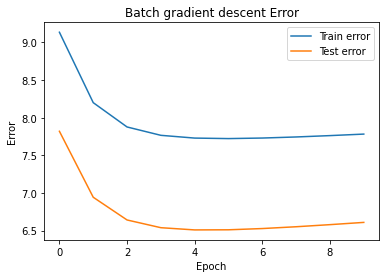

In [ ]:
plt.plot(train_accuracy,label='Train accuracy')
plt.plot(test_accuracy,label="Test accuracy")
plt.title("Batch gradient descent Accuracy")
plt.ylabel("Percentage %")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(train_error,label="Train error")
plt.plot(test_error,label="Test error")
plt.title("Batch gradient descent Error")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

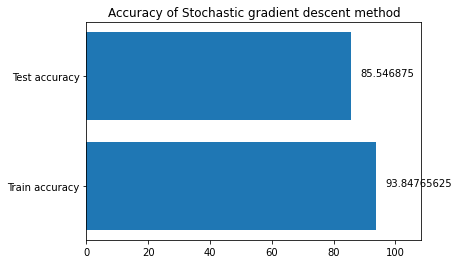

In [ ]:
labels = ['Train accuracy', 'Test accuracy']
values = [train_accuracy[9], test_accuracy[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

plt.title("Accuracy of Stochastic gradient descent method")
plt.show()

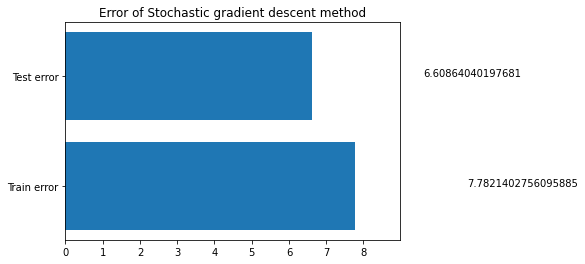

In [ ]:
labels = ['Train error', 'Test error']
values = [train_error[9], test_error[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.title("Error of Stochastic gradient descent method")
plt.show()

## **Method 3**: Mini-batch SGD

In [341]:
temp_matrix = (large_matrix)
shape = temp_matrix.shape
temp_matrix = temp_matrix.reshape((shape[0],shape[1]))
train_data, train_target, test_data, test_target = shuffle_and_split(temp_matrix,test_percent=0.2)

k = 10
batch_num = 5
sample_per_batch = np.int(np.round(train_data.shape[0]/batch_num)) #256


W_new =  np.zeros((train_data.shape[1],k)) # 2352*10
X_train = train_data
t_train = train_target
# print(t[1,:])

X_test = test_data
t_test = test_target



accuracy = []

average_train_error = []
average_test_error = []
average_train_accuracy = []
average_test_accuracy = []




for i in range (10):
  print ("epoch = ",i)

  train_accuracy = []
  test_accuracy = []

  train_error = []
  test_error = []

  for n in range(batch_num):
    train_temp = X_train[n*sample_per_batch:(n+1)*sample_per_batch,:]
    target_temp = t_train [n*sample_per_batch:(n+1)*sample_per_batch,:]
    
    y = softmax(np.dot(train_temp,W_new))
    error_train = error_calculation(y,target_temp)
    accuration_train = accuration_calulation(train_temp,W_new,target_temp)
    train_accuracy.append(accuration_train)
    train_error.append(error_train)

    y_test = softmax(np.dot(X_test,W_new))
    error_test = error_calculation(y_test,t_test)
    accuration_test = accuration_calulation(X_test,W_new,t_test)
    test_accuracy.append(accuration_test)
    test_error.append(error_test)

    
    for k in range(train_temp.shape[0]):
      X_ = train_temp[k,:]
      X_ = np.reshape(X_,(1,train_temp.shape[1]))
      t = target_temp[k,:]
      y = softmax(np.dot(X_,W_new))
      if (np.argmax(y) == np.argmax(t)):
        correct += 1
        # print(correct)
      # error_train = error_calculation(y,t)
      # accuration_train = accuration_calulation(X_,W_new,t)
      y_test = softmax(np.dot(X_test,W_new))
      # error_test = error_calculation(y_test,t_test)
      # accuration_test = accuration_calulation(X_test,W_new,t_test)
      R = np.dot(y,np.transpose(1-y)) #Keep in mind that R is a diagonal matrix
      R = diagonal(R)
      a = np.dot(np.transpose(X_),R)
      H = np.dot(a,X_)
      grad = np.dot(X_.transpose(),y-t)
      # print(error_train,error_test)
      # print(accuration_train, accuration_test)
      W_new = W_new - 0.001*grad

  average_train_accuracy.append(np.average(train_accuracy))
  average_test_accuracy.append(np.average(test_accuracy))
  average_train_error.append(np.average(train_error))
  average_test_error.append(np.average(test_error))
    
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8
epoch =  9


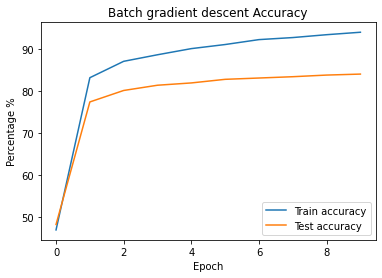

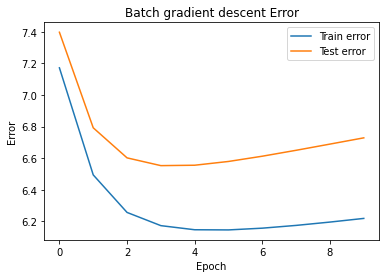

In [342]:
plt.plot(average_train_accuracy,label='Train accuracy')
plt.plot(average_test_accuracy,label="Test accuracy")
plt.title("Batch gradient descent Accuracy")
plt.ylabel("Percentage %")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(average_train_error,label="Train error")
plt.plot(average_test_error,label="Test error")
plt.title("Batch gradient descent Error")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

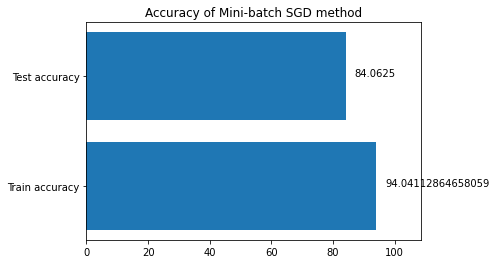

In [343]:
labels = ['Train accuracy', 'Test accuracy']
values = [average_train_accuracy[9], average_test_accuracy[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

plt.title("Accuracy of Mini-batch SGD method")
plt.show()

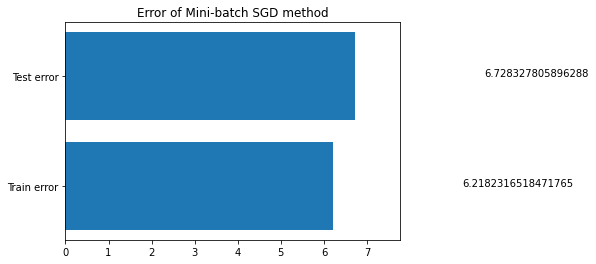

In [344]:
labels = ['Train error', 'Test error']
values = [average_train_error[9], average_test_error[9]]


fig, ax = plt.subplots()

ax.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.title("Error of Mini-batch SGD method")
plt.show()

## **1.2 c**
As we can observe from the result, the Mini-batch SGD gives the best result, with accuracy of training and testing is 94 and 84 percent. The second best performance is the SGD method with accuracy 93, 85 percent for training and testing data. The worst method is batch GD,  with 44 and 34 percent for accuracy. From these method, we learn that it is more efficiency to divide the data into multiple small batch. One more thing, from the Mini-batch SGD and SGD method, we see that although one method gives better training accuracy, it doesn't mean it will have a better testing accuracy.

## **1.3**
In 1.1 we can directly calculate the Weight, then apply it to predict the output without updating the weight. In problem 1.2 we use different approach to minimize the error, that is using gradient descent, which means we will have to update the weight after iterating each batch.For the second approach, we will let the weight to have a chance to loop through the data multiple times so that it can minimize the error and increase the accuracy.



---


# **2. Gaussian Process for Regression**

## Function for problem 2

In [374]:
def data2matrix(x):
  # concate data already passed through basis function
  a1 = np.ones((x.shape[0],1))
  a2 = x 
  matrix = np.concatenate((a1,a2),axis=1)
  M = 2
  for i in range (2,M+1):
    a = np.power(x,i)
    matrix = np.concatenate((matrix,a),axis=1)

  
  return matrix 

def diagonal(x):
  N = x.shape[0]
  diag = np.zeros((N,1))
  for i in range(N):
    diag[i] = x[i][i]
  return diag
    

def kernel(X1,X2):
  result = np.dot(X1,np.transpose(X2))
  return result

# def kernel(X1,X2):
#   result = np.exp(-np.linalg.norm(X1-X2)/2)
#   return result
# def kernel(x1, x2, l=1.0, sigma_f=1.0):
#     """More efficient approach."""
#     dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
#     return  np.exp(-0.5 / l ** 2 * dist_matrix)

def data_split(x,t,test_percent = 0.5):
  data = np.concatenate((x,t),axis=1)
  df = pd.DataFrame.from_records(data)
  df = df.sample(frac=1)

  data = np.array(df)
  test = data[0:round(data.shape[0]*test_percent), :]
  train = data[round(data.shape[0]*test_percent)-1:data.shape[0],:]

  train_data = train[:,0].reshape((train.shape[0],1))
  train_target = train[:,1].reshape((train.shape[0],1))
  test_data = test[:,0].reshape((test.shape[0],1))
  test_target = test[:,1].reshape((test.shape[0],1))

  # print(train_data.shape)
  X_train = data2matrix(train_data)
  # print(train_data[0,:])
  # print(X_train[0,:])
  
  T_train = train_target
  X_test = data2matrix(test_data)
  T_test = test_target

  return test_data, test_target,X_train, T_train, X_test, T_test

def error_cal(x,t):
  error = 0 
  N = x.shape[0]
  for i in range(x.shape[0]):
    error = error + 1/N*(x[i]-t[i])**2

  error = np.sqrt(error)
  return error

# def cal_C(X_train,X_test,k):
#   C = 


#-------------------------------------------------------------------------
# for second part 
def data_split_gaussian(x,t,test_percent = 0.5):
  data = np.concatenate((x,t),axis=1)
  df = pd.DataFrame.from_records(data)
  df = df.sample(frac=1)

  data = np.array(df)
  test = data[0:round(data.shape[0]*test_percent), :]
  train = data[round(data.shape[0]*test_percent)-1:data.shape[0],:]

  train_data = train[:,0].reshape((train.shape[0],1))
  train_target = train[:,1].reshape((train.shape[0],1))
  test_data = test[:,0].reshape((test.shape[0],1))
  test_target = test[:,1].reshape((test.shape[0],1))

  # print(train_data.shape)
  X_train = train_data
  # print(train_data[0,:])
  # print(X_train[0,:])
  
  T_train = train_target
  X_test = test_data
  T_test = test_target

  return test_data, test_target,X_train, T_train, X_test, T_test
def exp_kernel (X1,X2,type):

  if type == "linear":
    the1, the2,the3, the4 = 0, 0, 0, 1
  elif type == "squared":
    the1, the2,the3, the4 = 1, 1, 0, 0
    # dist_matrix = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2 * np.dot(x1, x2.T)
    # result = sigma_f ** 2 * np.exp(-0.5 / l ** 2 * dist_matrix)
  elif type == "exp1":
    the1, the2,the3, the4 = 1, 1, 0, 16
  elif type == "exp2":
    # print("exp2")
    the1, the2,the3, the4 = 1, 1, 16,0
  # print(the1)
  
  matrix = []
  for k in range (X2.shape[0]):
    result = []
    for i in range (X1.shape[0]):
      temp = the1*np.exp(-the2/2*np.dot((X1[i]-X2[k]).transpose(),X1[i]-X2[k])) + the3 + the4*np.dot(X1[i],X2[k].transpose())
      result.append(temp)
      result1 = np.array(result)
    matrix.append(result)

  matrix = np.array(matrix)
  # print(matrix.shape)
  return matrix.transpose()

def mean_cov (X_train,T_train,test):
  
  X_test = data2matrix(test)
  k = kernel(X_train,X_test)
  Cn = kernel(X_train,X_train)
  c = kernel(X_test,X_test)+1

  temp = np.dot(k.transpose(), np.linalg.inv(Cn+  np.eye(len(X_train))))
  mean =np.dot (temp,  T_train)
  cov = c - np.dot(temp,k)

  a = mean.ravel()
  a = a.reshape((len(a),1))

  return a, cov

def mean_cov_gaussian (X_train,T_train,test,type):
  
  X_test = (test)
  k = exp_kernel(X_train,X_test,type)
  Cn = exp_kernel(X_train,X_train,type)
  c = exp_kernel(X_test,X_test,type)+1

  temp = np.dot(k.transpose(), np.linalg.inv(Cn+  np.eye(len(X_train))))
  mean =np.dot (temp,  T_train)
  cov = c - np.dot(temp,k)

  a = mean.ravel()
  a = a.reshape((len(a),1))

  return a, cov

def data_normalize(x):
  x = (x-x.max())/(x.max() - x.min())
  return x



## 2.1 Construct a kernel function using the basis functions

The root mean square error =  [2475.56697028]


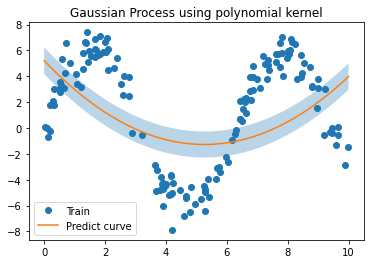

In [375]:
x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework2/x.csv")
t = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework2/t.csv")
x = np.array(x)
t = np.array(t)

# X_train = np.array([3, 1, 4, 5, 9]).reshape(-1, 1)
# T_train = np.array([-0.990102063600402,0.5401609836225097,-0.6536735541146899,0.28352602801580806,-0.91100025015764]).reshape(-1, 1)
# X_test =np.arange(0, 10, 0.2).reshape(-1, 1)
# X_train = data2matrix(X_train)
# x_temp = X_test
# X_test = data2matrix(X_test)

x_temp,t_temp,X_train, T_train, X_test, T_test = data_split(x,t)

k = kernel(X_train,X_test)
Cn = kernel(X_train,X_train)
c = kernel(X_test,X_test)

temp = np.dot(k.transpose(), np.linalg.inv(Cn+ 1 * np.eye(len(X_train))))
temp = np.dot(k.transpose(), np.linalg.inv(Cn))
mean =np.dot (temp,  T_train)
cov = c - np.dot(temp,k)

a = mean.ravel()
a = a.reshape((len(a),1))

error_rms = error_cal(mean,T_train)
print("The root mean square error = ", error_rms)

## create the array of input that has increasing value for drawing prediction curve
test = np.linspace(0,10,150).reshape((-1,1))
mean, cov = mean_cov(X_train,T_train,test)
uncertainty = np.sqrt(np.diagonal(cov)) # fix uncertainty
uncertainty = np.nan_to_num(uncertainty)

plt.plot(x_temp,t_temp,label = "Train",marker='o',linestyle = "None")
plt.plot(test.ravel(),mean.ravel(),label="Predict curve")
plt.legend()
plt.title("Gaussian Process using polynomial kernel")


uper = mean + uncertainty.reshape((-1,1))
lower = mean - uncertainty.reshape((-1,1))
error = error_cal(mean,t_temp)
plt.fill_between(test.flatten(), lower.flatten(), uper.flatten(), alpha=0.3)

plt.show()






# 2.2 Exponential-quadratic kernel function
## Data loading

In [377]:
x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework2/x.csv")
t = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework2/t.csv")

x_temp,t_temp,X_train, T_train, X_test, T_test = data_split_gaussian(x,t)

# X_train = np.array([3, 1, 4, 5, 9]).reshape(-1, 1)
# T_train = np.array([-0.990102063600402,0.5401609836225097,-0.6536735541146899,0.28352602801580806,-0.91100025015764]).reshape(-1, 1)
# X_test =np.array([3,5,6,2,1]).reshape(-1, 1)

# X_train = data_normalize(X_train)
# T_train = data_normalize(T_train)
# X_test = data_normalize(X_test)


# X_train = data2matrix(X_train)
# x_temp = X_test
# X_test = data2matrix(X_test)


## 1. Linear kernel

The root mean square error =  [4.37824909]


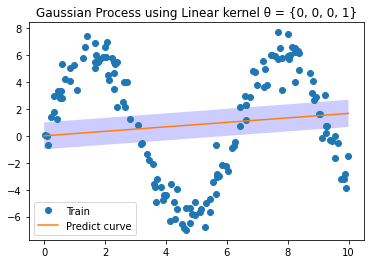

In [378]:
##/ Linear kernel
type = "linear"
k = exp_kernel(X_train,X_test,type)
Cn = exp_kernel(X_train,X_train,type)
c = exp_kernel(X_test,X_test, type)

temp = np.dot(k.transpose(), np.linalg.inv(Cn+ 1e-8 * np.eye(len(X_train))))
mean =np.dot (temp,  T_train)
cov = c - np.dot(temp,k)

a = mean.ravel()
a = a.reshape((len(a),1))

error_rms = error_cal(mean,T_train)
print("The root mean square error = ", error_rms)

## create the array of input that has increasing value for drawing prediction curve
test = np.linspace(0,10,100).reshape((-1,1))
mean, cov = mean_cov_gaussian(X_train,T_train,test,type= type)
uncertainty = np.sqrt(cov.diagonal()) # fix uncertainty
uncertainty = np.nan_to_num(uncertainty)

uper = mean + uncertainty.reshape((-1,1))
lower = mean - uncertainty.reshape((-1,1))
error = error_cal(mean,t_temp)

plt.plot(x_temp,t_temp,label = "Train",marker='o',linestyle = "None")

plt.plot(test.ravel(),mean.ravel(),label="Predict curve")
plt.fill_between(test.ravel(),lower.ravel(),uper.ravel(), alpha=0.2,facecolor = "blue")
plt.title("Gaussian Process using Linear kernel θ = {0, 0, 0, 1}")

plt.legend()
plt.show()



---


## 2. Squared exponential 

The root mean square error =  [5.54641997]


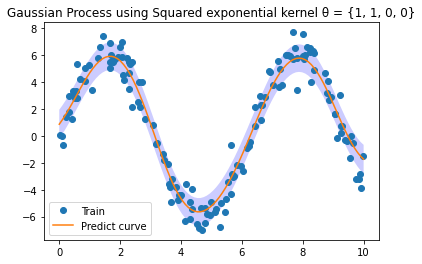

In [383]:
##/ Squared exponential kernel
type = "squared"
k = exp_kernel(X_train,X_test,type)
Cn = exp_kernel(X_train,X_train,type)
c = exp_kernel(X_test,X_test, type)

temp = np.dot(k.transpose(), np.linalg.inv(Cn+ 1e-8 * np.eye(len(X_train))))
mean =np.dot (temp,  T_train)
cov = c - np.dot(temp,k)

a = mean.ravel()
a = a.reshape((len(a),1))

error_rms = error_cal(mean,T_train)
print("The root mean square error = ", error_rms)

## create the array of input that has increasing value for drawing prediction curve
test = np.linspace(0,10,100).reshape((-1,1))
mean, cov = mean_cov_gaussian(X_train,T_train,test,type= type)
uncertainty = np.sqrt(cov.diagonal()) # fix uncertainty
uncertainty = np.nan_to_num(uncertainty)

uper = mean + uncertainty.reshape((-1,1))
lower = mean - uncertainty.reshape((-1,1))
error = error_cal(mean,t_temp)

plt.plot(x_temp,t_temp,label = "Train",marker='o',linestyle = "None")

plt.plot(test.ravel(),mean.ravel(),label="Predict curve")
plt.fill_between(test.ravel(),lower.ravel(),uper.ravel(), alpha=0.2,facecolor = "blue")
plt.title("Gaussian Process using Squared exponential kernel θ = {1, 1, 0, 0}")

plt.legend()
plt.show()



---


## 3. Exponential-quadratic kernel (type 1) 





The root mean square error =  [5.54665197]


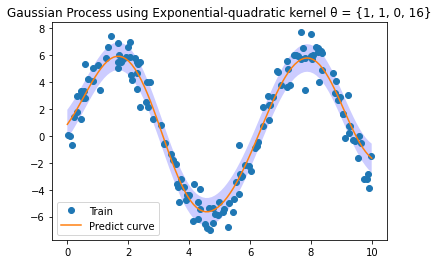

In [381]:
##/ Exponential-quadratic kernel (type 1)
type = "exp1"
k = exp_kernel(X_train,X_test,type)
Cn = exp_kernel(X_train,X_train,type)
c = exp_kernel(X_test,X_test, type)

temp = np.dot(k.transpose(), np.linalg.inv(Cn+ 1e-8 * np.eye(len(X_train))))
mean =np.dot (temp,  T_train)
cov = c - np.dot(temp,k)

a = mean.ravel()
a = a.reshape((len(a),1))

error_rms = error_cal(mean,T_train)
print("The root mean square error = ", error_rms)

## create the array of input that has increasing value for drawing prediction curve
test = np.linspace(0,10,100).reshape((-1,1))
mean, cov = mean_cov_gaussian(X_train,T_train,test,type= type)
uncertainty = np.sqrt(cov.diagonal()) # fix uncertainty
uncertainty = np.nan_to_num(uncertainty)

uper = mean + uncertainty.reshape((-1,1))
lower = mean - uncertainty.reshape((-1,1))
error = error_cal(mean,t_temp)

plt.plot(x_temp,t_temp,label = "Train",marker='o',linestyle = "None")

plt.plot(test.ravel(),mean.ravel(),label="Predict curve")
plt.fill_between(test.ravel(),lower.ravel(),uper.ravel(), alpha=0.2,facecolor = "blue")
plt.title("Gaussian Process using Exponential-quadratic kernel θ = {1, 1, 0, 16}")

plt.legend()
plt.show()



---


## 3. Exponential-quadratic kernel (type 2) 





The root mean square error =  [5.54650709]


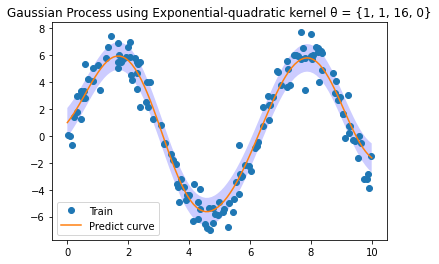

In [382]:
##/ Exponential-quadratic kernel (type 2)
type = "exp2"
k = exp_kernel(X_train,X_test,type)
Cn = exp_kernel(X_train,X_train,type)
c = exp_kernel(X_test,X_test, type)

temp = np.dot(k.transpose(), np.linalg.inv(Cn+ 1e-8 * np.eye(len(X_train))))
mean =np.dot (temp,  T_train)
cov = c - np.dot(temp,k)

a = mean.ravel()
a = a.reshape((len(a),1))

error_rms = error_cal(mean,T_train)
print("The root mean square error = ", error_rms)

## create the array of input that has increasing value for drawing prediction curve
test = np.linspace(0,10,100).reshape((-1,1))
mean, cov = mean_cov_gaussian(X_train,T_train,test,type= type)
uncertainty = np.sqrt(cov.diagonal()) # fix uncertainty
uncertainty = np.nan_to_num(uncertainty)

uper = mean + uncertainty.reshape((-1,1))
lower = mean - uncertainty.reshape((-1,1))
error = error_cal(mean,t_temp)

plt.plot(x_temp,t_temp,label = "Train",marker='o',linestyle = "None")

plt.plot(test.ravel(),mean.ravel(),label="Predict curve")
plt.fill_between(test.ravel(),lower.ravel(),uper.ravel(), alpha=0.2,facecolor = "blue")
plt.title("Gaussian Process using Exponential-quadratic kernel θ = {1, 1, 16, 0}")

plt.legend()
plt.show()

## 2.4
At first, when calculating the kernel, I use the dot product for the 2 matrix and return the result. And it turned out the result of predictive curve is the straight line only. Furthermore I got stuck to use this approach when the two input matrix into the kernel are different dimension. After doing some research and dicussing with classmate, I found out the better approach that is to calculate the single point with single point, after that concate it back to a matrix. This way, the problem of differences in dimensions are solved. 

The Gaussian Process can directly calculate the predictive curve based on the training data without calculating the weight parameters. With the covariance matrix, we can derive out the uncertainty for each point
